# Example: $\beta$-lactamases

In [1]:
cd ../

/Users/sam/Documents/GitHub/bioviper


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bioviper import msa, pdb, phylo

I've downloaded an alignment of approximately 5,000 $\beta$-lactamase sequences from Pfam. We can start by loading the alignment. This alignment is quite large, so I will make sure that it does not by default calculate the position-wise frequencies in the alignment:

In [6]:
bla15_aln = msa.readAlignment("example_files/alignments/beta_lactamases_pfam_rp15.fa")
print(bla15_aln)

Alignment with 5011 rows and 1653 columns
FEQNFRDGWE-----------P-EG-A-S---------------...--- A0A0N4WS98/47-410
FERNFRDGWE-----------S-VG-A-A---------------...--- A0A0N4WS98/446-766
-RRNFRDGWE-----------S-VG-A-A---------------...--- A0A0N4WS98/808-1154
IEALIAEEMA--------RRHI-PG-L-S---------------...--- A0A517SIU4/36-364
-------------------KNI-PA-F-S---------------...--- A0A517SIU4/417-716
--DRVSEAIS--------NRGI-PG-L-S---------------...--- A0A1P8WNG2/35-358
--QAVKIEVE--------QKQL-PA-F-S---------------...--- A0A1P8WNG2/388-714
------DGLE-----------T-DG-A-A---------------...L-- A0A183ILD0/40-400
-----------------------EG-A-A---------------...--- A0A183ILD0/414-805
FRSNFVDGWE-----------R-GG-A-A---------------...L-- A0A3P7VNF1/49-364
--------------------------------------------...--- A0A3P7VNF1/367-662
----LEARAA--------TLDA-PG-F-T---------------...--- I0IH98/31-350
-EAAVRGIVG--------GSAV-RR-A-A---------------...--- I0IH98/379-668
--------------------NI-PG-L-T---------------...--- A0A1S3IBK9

This alignment is quite long, and from the above I suspect that many columns are almost all gaps. To get a better sense of this, I will calculate the alignment coverage.

Text(0.5, 0, 'Alignment position')

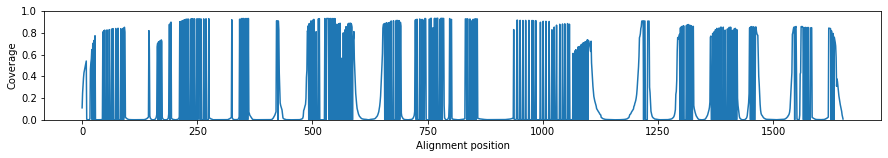

In [7]:
plt.figure(figsize=(15,2))
plt.plot(bla15_aln.calc_coverage())
plt.ylim(0,1)
plt.ylabel('Coverage')
plt.xlabel('Alignment position')

I am going to threshold this alignment to only keep positions that are at least 50% conserved. (Later I will get into other ways to do this based on alignment probability thresholds!)

Note that because I previously called bla15_aln.calc_coverage(), bla15_aln now has a .coverage attribute.

In [8]:
bla15_aln = bla15_aln[:,bla15_aln.coverage > 0.5]
print(bla15_aln)

Alignment with 5011 rows and 310 columns
GWE--PEGASLAVFVKGRKVVDLWGGYADKQAARIWKEDTVTVT...MKA A0A0N4WS98/47-410
GWE--SVGAAFAVFVKGRKVVDLWGGYADKQAARPWKEDTLMIT...LKA A0A0N4WS98/446-766
GWE--SVGAAFAVFVKGRAVVDLWGGYADKQAAQPWKEDTLMVT...LKA A0A0N4WS98/808-1154
EMARHIPGLSICVATDNEIQFERGFGLADVENGLPVTVETKFRT...QG- A0A517SIU4/36-364
---KNIPAFSISLVDGDRVVWAQGFGTARADGNVPATADSLYRV...--- A0A517SIU4/417-716
AISRGIPGLSLAIGHDNQVCYSKGFGLADVEHDVRASTDTRYRT...QNT A0A1P8WNG2/35-358
EVEKQLPAFSISLVDNDRMVWADGSGFQDAKQSRPATSDTVYRV...DGS A0A1P8WNG2/388-714
GLE--TDGAAFAVYKDGVAVVDLWGGYANVSSRKPWEKDTMAIV...MKP A0A183ILD0/40-400
------EGAAFSVYVDGKLVVDVWGGYADYSTNREWKADTMGLW...MKL A0A183ILD0/414-805
GWE--RGGAAFVVYFNGKKVVDLWGGYADKECGRLWRKDTLNVA...LKV A0A3P7VNF1/49-364
------------LYDVGQCVVDIWGGFADRESERRWREDTLQII...--- A0A3P7VNF1/367-662
RAALDAPGFTAAVLRGGDLATHAG-GFRDEGETEAMRPGDRFRL...SAE I0IH98/31-350
IVGSAVRRAAVVVVEDGRASEPLGAG--------SADGSGRFRA...--- I0IH98/379-668
----NIPGLTLAVVKDGEVVISKGYGVKDVVSKEPVTNTTLFNI...RES A0A1S3IBK9/

Much better! Now I want to check to make sure that all sequences are aligned to all of the key features of beta lactamase, so I am going to make a histogram of the sequence lengths fo this new filtered alignment. I want to do this *after* filtering the positions because I am interested in how many positions aligned to the core conserved positions, not just the total length of the sequences.

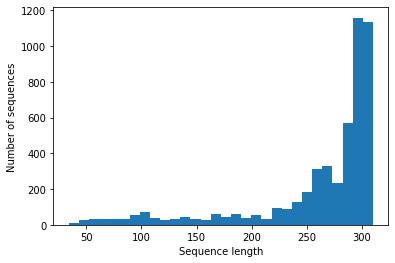

In [9]:
plt.xlabel('Sequence length')
plt.ylabel('Number of sequences')
plt.hist(bla15_aln.sequence_lengths(), bins=30); None

As you can see, the majority of sequences are aligned at at least 250 positions, but there are a decent number that were either fragments to start out with or did not align properly to the core conserved fold. I will filter out those sequences shorter than 225 aa:

In [10]:
bla15_aln = bla15_aln[bla15_aln.sequence_lengths() > 225]
print(bla15_aln)

Alignment with 4162 rows and 310 columns
GWE--PEGASLAVFVKGRKVVDLWGGYADKQAARIWKEDTVTVT...MKA A0A0N4WS98/47-410
GWE--SVGAAFAVFVKGRKVVDLWGGYADKQAARPWKEDTLMIT...LKA A0A0N4WS98/446-766
GWE--SVGAAFAVFVKGRAVVDLWGGYADKQAAQPWKEDTLMVT...LKA A0A0N4WS98/808-1154
EMARHIPGLSICVATDNEIQFERGFGLADVENGLPVTVETKFRT...QG- A0A517SIU4/36-364
---KNIPAFSISLVDGDRVVWAQGFGTARADGNVPATADSLYRV...--- A0A517SIU4/417-716
AISRGIPGLSLAIGHDNQVCYSKGFGLADVEHDVRASTDTRYRT...QNT A0A1P8WNG2/35-358
EVEKQLPAFSISLVDNDRMVWADGSGFQDAKQSRPATSDTVYRV...DGS A0A1P8WNG2/388-714
GLE--TDGAAFAVYKDGVAVVDLWGGYANVSSRKPWEKDTMAIV...MKP A0A183ILD0/40-400
------EGAAFSVYVDGKLVVDVWGGYADYSTNREWKADTMGLW...MKL A0A183ILD0/414-805
GWE--RGGAAFVVYFNGKKVVDLWGGYADKECGRLWRKDTLNVA...LKV A0A3P7VNF1/49-364
RAALDAPGFTAAVLRGGDLATHAG-GFRDEGETEAMRPGDRFRL...SAE I0IH98/31-350
IVGSAVRRAAVVVVEDGRASEPLGAG--------SADGSGRFRA...--- I0IH98/379-668
----NIPGLTLAVVKDGEVVISKGYGVKDVVSKEPVTNTTLFNI...RES A0A1S3IBK9/45-374
----NIPGLTLAVVKDGEVVISKGYGVKDVVSKEPVTNTTLFNI...RES A0A1S3IBK9/6

In [11]:
bla15_aln.calc_frequencies()

,-,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,0.451706,0.091302,0.004085,0.006728,0.024507,0.048534,0.059827,0.011773,0.020903,0.011052,...,0.013455,0.014656,0.004085,0.020423,0.027391,0.035560,0.014656,0.019702,0.003123,0.041326
1,0.427919,0.024507,0.001442,0.006247,0.005046,0.014656,0.011533,0.004325,0.072802,0.009611,...,0.113167,0.007689,0.010091,0.014176,0.048294,0.010572,0.009851,0.105478,0.028352,0.004325
2,0.409659,0.134310,0.000240,0.084575,0.121816,0.001201,0.021144,0.007929,0.002403,0.062710,...,0.000240,0.016098,0.001201,0.040365,0.040125,0.022826,0.023787,0.006247,0.000240,0.000961
3,0.417828,0.030034,0.002643,0.024027,0.024267,0.010572,0.134070,0.036281,0.001682,0.043248,...,0.002162,0.034118,0.009851,0.036040,0.043489,0.030995,0.043489,0.004085,0.015617,0.035560
4,0.379625,0.051658,0.000721,0.047814,0.036521,0.001201,0.133590,0.028352,0.005526,0.072561,...,0.001922,0.051177,0.006007,0.043489,0.062230,0.025469,0.015617,0.016338,0.004325,0.002883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.145843,0.024988,0.000961,0.015137,0.007208,0.001201,0.004325,0.014176,0.000240,0.006487,...,0.000000,0.576646,0.001201,0.098510,0.006728,0.048054,0.043729,0.001682,0.000240,0.000721
306,0.170111,0.062951,0.007208,0.021144,0.012254,0.011052,0.120855,0.022105,0.029313,0.037722,...,0.012975,0.034118,0.004085,0.035560,0.121576,0.105959,0.070639,0.031235,0.008169,0.016338
307,0.198462,0.050697,0.002643,0.062951,0.043969,0.040605,0.048054,0.005286,0.013936,0.018501,...,0.053820,0.059346,0.049736,0.036761,0.026670,0.059587,0.044450,0.075685,0.005286,0.014897
308,0.237866,0.038683,0.001922,0.058626,0.029793,0.012494,0.089380,0.058385,0.008650,0.043969,...,0.007208,0.058626,0.099471,0.019942,0.023066,0.071120,0.063431,0.018741,0.000961,0.042528


To get a better sense of the diversity in this alignment, I'd like to set sequence weights for each of these sequences based on  their number of neighbors. I have a function to do so based on the default sequence weighting from EVcouplings:

In [12]:
def cluster_sizes(ali, thresh):

    '''For each sequence in an alignment, calculate how many other sequences from the alignment are within 
        a given identity threshold of that sequence.'''
    
    try:
        imat = ali.identity_matrix 
    except:
        imat = CalcIdentityMatrix(ali)
    
    return np.array([np.sum(imat[i] > thresh) for i in range(ali.N)])

I'll start by calculating the percent identity matrix for each sequence and attaching this as an attribute of bla_aln. Since this will take a moment, this way it will be stored with the alignment and I won't have to calculate it again if I want to use it.

In [14]:
bla15_aln.identity_matrix = msa.CalcIdentityMatrix(bla15_aln)

I can then set the sequence weights. The cluster_sizes() function will automatically known to use the .identity_matrix feature of bla15_aln, and bla15_aln's set_sequence_weights() function will add the weights into the alignment both as a feature of the alignment, .sequence_weights, and each one as a feature of its individual sequence record, as record.weight.

In [15]:
bla15_aln.set_sequence_weights(np.ones(bla15_aln.N) / cluster_sizes(bla15_aln, 0.8))
print('Neff:', np.sum(bla15_aln.sequence_weights))

Neff: 3825.5301468356206


In [16]:
bla15_aln.calc_frequencies()

,-,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,0.459217,0.095107,0.003485,0.007058,0.024049,0.050407,0.056536,0.012678,0.022219,0.010805,...,0.012678,0.015946,0.004444,0.021958,0.028885,0.011371,0.015815,0.021174,0.003398,0.044046
1,0.434951,0.025966,0.001568,0.006796,0.005489,0.015292,0.010979,0.004182,0.074578,0.010456,...,0.110189,0.007842,0.010979,0.014987,0.026663,0.011240,0.010717,0.112978,0.025203,0.004705
2,0.416653,0.110319,0.000261,0.090053,0.123621,0.001307,0.021174,0.007581,0.002614,0.065002,...,0.000261,0.016860,0.001307,0.043480,0.042086,0.022350,0.025007,0.006796,0.000261,0.001046
3,0.420813,0.032022,0.002875,0.025356,0.025748,0.011240,0.137810,0.038034,0.001830,0.046007,...,0.002353,0.035507,0.009776,0.035943,0.045397,0.028911,0.021827,0.004313,0.016338,0.037511
4,0.380296,0.049718,0.000784,0.050973,0.038339,0.001307,0.115235,0.030061,0.006012,0.072626,...,0.002091,0.052803,0.005794,0.046660,0.064958,0.026532,0.016076,0.017775,0.004705,0.003137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.150542,0.025095,0.001046,0.016468,0.007842,0.001307,0.004705,0.015423,0.000261,0.006927,...,0.000000,0.557515,0.001307,0.103384,0.007319,0.049492,0.046399,0.001830,0.000261,0.000784
306,0.176291,0.066091,0.007842,0.021435,0.013331,0.010979,0.120876,0.022742,0.027316,0.035185,...,0.012547,0.019104,0.004444,0.038426,0.131485,0.089057,0.074630,0.033721,0.008888,0.017383
307,0.206003,0.054894,0.002875,0.067050,0.046268,0.026206,0.050973,0.005751,0.013985,0.018429,...,0.056419,0.037511,0.050755,0.034015,0.027839,0.063521,0.047052,0.082080,0.005489,0.015684
308,0.245420,0.036883,0.002091,0.061517,0.031891,0.013593,0.095150,0.062998,0.009410,0.040670,...,0.007842,0.062824,0.104430,0.021435,0.021827,0.062253,0.038208,0.020128,0.001046,0.044438


Next I'll show examples of loading in a protein structure and a phylogenetic tree, and how we can interrelate these with the multiple sequence alignment.

In [22]:
bla_pdb = pdb.readPDB("example_files/structures/1xpb.pdb", name="1XPB")
print(bla_pdb)

Protein structure 1XPB with 399 residues and 2167 atoms


If we didn't have an experimental structure, or simply wanted to compare to the AlphaFold structure, we can automatically fetch and load the AlphaFold structure. Let's do so for the first sequence in our alignment:

In [33]:
uniprot_id = bla15_aln.ids[0].split("/")[0]
bla_af = pdb.alphafold_from_uniprot(uniprot_id)

--2023-04-07 17:26:50--  https://alphafold.ebi.ac.uk/files/AF-A0A0N4WS98-F1-model_v4.pdb
Resolving alphafold.ebi.ac.uk (alphafold.ebi.ac.uk)... 34.149.152.8
Connecting to alphafold.ebi.ac.uk (alphafold.ebi.ac.uk)|34.149.152.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘AF-A0A0N4WS98-F1-model_v4.pdb.2’

     0K .......... .......... .......... .......... ..........  443K
    50K .......... .......... .......... .......... .......... 9.07M
   100K .......... .......... .......... .......... ..........  725K
   150K .......... .......... .......... .......... ..........  927K
   200K .......... .......... .......... .......... .......... 7.13M
   250K .......... .......... .......... .......... .......... 2.14M
   300K .......... .......... .......... .......... .......... 7.82M
   350K .......... .......... .......... .......... ..........  889K
   400K .......... .......... .......... .......... .......... 

We can plot the predicted aligned error matrix if we'd like:

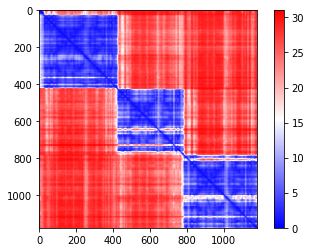

In [42]:
plt.imshow(bla_af.pae, cmap="bwr")
plt.colorbar()

In [47]:
bla15_aln.attach_structure(bla_af, 0)
print(bla15_aln.structures)

[(0, <bioviper.pdb.ProteinStructure object at 0x15dbc6290>), (0, <bioviper.pdb.ProteinStructure object at 0x15dbc6290>)]


In [46]:
bla15_aln.structures

[(0, <bioviper.pdb.ProteinStructure at 0x15dbc6290>)]